Problem Statement : To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.

age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin value

referral_source - different sources of referals

Class - different types of thyroid

In [1]:
# for database
import numpy as np
import pandas as pd

# for stats
import scipy.stats as stats


# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# imputer for missing values
from sklearn.impute import KNNImputer


# for encoding
from sklearn.preprocessing import LabelEncoder


# show all columns
pd.set_option('display.max_columns',None)


# for warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df=pd.read_csv('hypothyroid.csv')

In [3]:
# checking the first five rows
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [4]:
#checking the last 10 rows
df.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative
3771,64,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.2,t,99,t,1.07,t,92,f,?,other,negative


In [5]:
#no of rows and columns in the data
print('no of rows:',df.shape[0])
print('no of columns:',df.shape[1])

no of rows: 3772
no of columns: 30


In [6]:
#checking null values
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [7]:
#five pointer summary for the dataset
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on_thyroxine,3772,2,f,3308
query_on_thyroxine,3772,2,f,3722
on_antithyroid_medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid_surgery,3772,2,f,3719
I131_treatment,3772,2,f,3713
query_hypothyroid,3772,2,f,3538


- It is not showing any null values right now but as we can see that there are lots of values
  containing '?'

In [8]:
#checking data types of the given column
df.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

In [9]:
#checking out the how many '?' are present in dataset in each column
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


 so we have so check how many '?' are present  and we have observed that a lots of '?' present 
 in every column except Age column as it contains only '?' column in the dataset
 then we have to convert '?' into np.nan then we have to impute them accordingly

In [10]:
# we will drop the column 'TBG' as it contains 100% '?' values
df=df.drop(columns='TBG',axis=1)

Also, looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not. Let's see an example:

In [11]:
df[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


**Since, we are any ways going to handle the missing values, there is no point of having such columns in our dataset.that creates redundancy in our data and have no use.**

`Let's drop such columns as well.`

In [12]:
df = df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [13]:
df.shape

(3772, 23)

In [14]:
# Now let's replace the '?' values with numpy.nan
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        df[column] = df[column].replace('?',np.nan) 

In [15]:
#checking out again whether the '?' are replaced or not
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count())

In [16]:
df.head(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,SVI,negative
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.03,NaN,183,1.3,141,other,negative
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,72,0.92,78,other,negative
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,2.2,0.6,80,0.7,115,SVI,negative
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,0.6,2.2,123,0.93,132,SVI,negative
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,2.4,1.6,83,0.89,93,SVI,negative


In [17]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Since the values are categorical, we have to change them to numerical before we use any imputation techniques.


We can use get dummies but since most of the columns have only two distinct categories we will use mapping for them. Why? Because since there are only two categories then the two columns formed after get dummies will both have very high correaltion since they both explain the same thing. So in anyway we will have to drop one of the columns. That's why let's use mapping for such columns. For columns with more than two categories we will use get dummies.

In [18]:
#checking the distinct values in each column
for column in df.columns:
    print(column, (df[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex ['F' 'M' nan]
on_thyroxine ['f' 't']
query_on_thyroxine ['f' 't']
on_antithyroid_medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
I131_treatment ['f' 't']
query_hypothyroid ['f' 't']
query_hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3'

In [19]:
# We can map the categorical values:
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
for column in df.columns:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns as we require. Now there are handful of column left with more than 2 categories. 


In [20]:
df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [21]:
# we will use get_dummies with that.
df = pd.get_dummies(df,columns=['referral_source'])

In [22]:
df['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

- class column has 4 different categories inside it. so, I will use label encoder here as 
  no benefit of making dummies here.

In [23]:
lblEncdr = LabelEncoder()
df['Class'] =lblEncdr.fit_transform(df['Class'])

In [24]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,1,0,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,1,0,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,1,0,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,1,0,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,1,0,0,0,1,0


In [25]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3771,93,59,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,3622.0,NaN,NaN,NaN,0.315295,0.464698,0.0,0.0,0.0,1.0,1.0
on_thyroxine,3772.0,NaN,NaN,NaN,0.123012,0.328494,0.0,0.0,0.0,0.0,1.0
query_on_thyroxine,3772.0,NaN,NaN,NaN,0.013256,0.114382,0.0,0.0,0.0,0.0,1.0
on_antithyroid_medication,3772.0,NaN,NaN,NaN,0.0114,0.106174,0.0,0.0,0.0,0.0,1.0
sick,3772.0,NaN,NaN,NaN,0.038971,0.193552,0.0,0.0,0.0,0.0,1.0
pregnant,3772.0,NaN,NaN,NaN,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
thyroid_surgery,3772.0,NaN,NaN,NaN,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
I131_treatment,3772.0,NaN,NaN,NaN,0.015642,0.124101,0.0,0.0,0.0,0.0,1.0
query_hypothyroid,3772.0,NaN,NaN,NaN,0.062036,0.241253,0.0,0.0,0.0,0.0,1.0


In [26]:
# now all categorical values has been encoded. Doing missing value imputation now

### Missing Value Imputation


In [27]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
from sklearn.preprocessing import StandardScaler

In [28]:
sc= StandardScaler()

In [29]:
for i in ['TSH','T3','TT4','T4U','FTI']:
    df.loc[:,i] = sc.fit_transform(pd.DataFrame(df.loc[:,i]))

In [30]:
x = imputer.fit_transform(df[['TSH','T3','TT4','T4U','FTI']])

In [31]:
a= pd.DataFrame(data = x,columns=['TSH','T3','TT4','T4U','FTI'])

In [32]:
df.drop(columns=['TSH','T3','TT4','T4U','FTI'],axis= 1,inplace =True)

In [33]:
c = pd.DataFrame(sc.inverse_transform(a),columns =a.columns)

In [34]:
final = pd.concat([df,c],axis=1)

In [35]:
final.drop(index=1985,axis= 1,inplace = True)

In [36]:
final.loc[final['sex'].isnull(),'sex']=final['sex'].median()

In [37]:
final 

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,TSH,T3,TT4,T4U,FTI
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,105.359724,129.925513,125.972133,135.017296,109.000000
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,109.138090,109.929770,104.596645,124.859670,94.666667
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,104.927911,105.930622,111.102229,96.079728,120.000000
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,103.821390,105.930622,172.440585,112.444793,176.000000
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,104.577063,77.936582,66.492515,89.307976,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,110.469649,110.469649,110.469649,110.469649,110.469649
3768,68,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,104.954899,113.928919,125.042764,124.859670,114.000000
3769,74,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,110.487507,101.931473,113.890336,123.166732,105.000000
3770,72,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,104.550074,109.929770,86.009265,101.158541,87.000000


In [38]:
final.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
dtype: int64

In [39]:
#Now there are no missing values in our new dataset.

In [40]:
final.dtypes

age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
Class                          int32
referral_source_STMW           uint8
referral_source_SVHC           uint8
referral_source_SVHD           uint8
referral_source_SVI            uint8
referral_source_other          uint8
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
d

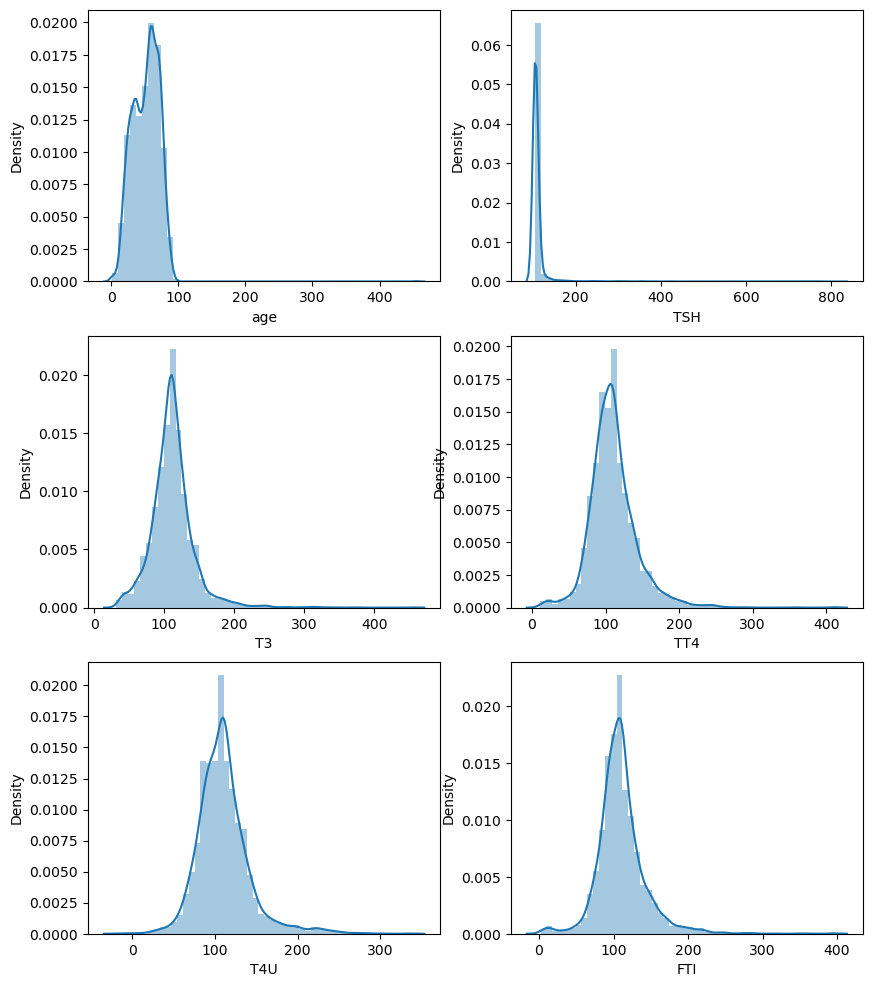

In [41]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,12))
t = 1

for i in columns:
    plt.subplot(3,2,t)
    sns.distplot(final[i])
    plt.xlabel(i,fontsize=10)
    t+=1
plt.show()

The graphs for age, TSH and T3 looks heavely skewed towards left. Let's do some transformations to the data and see if it improves the plot.

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.

In [42]:
final['age']= final['age'].astype(int)

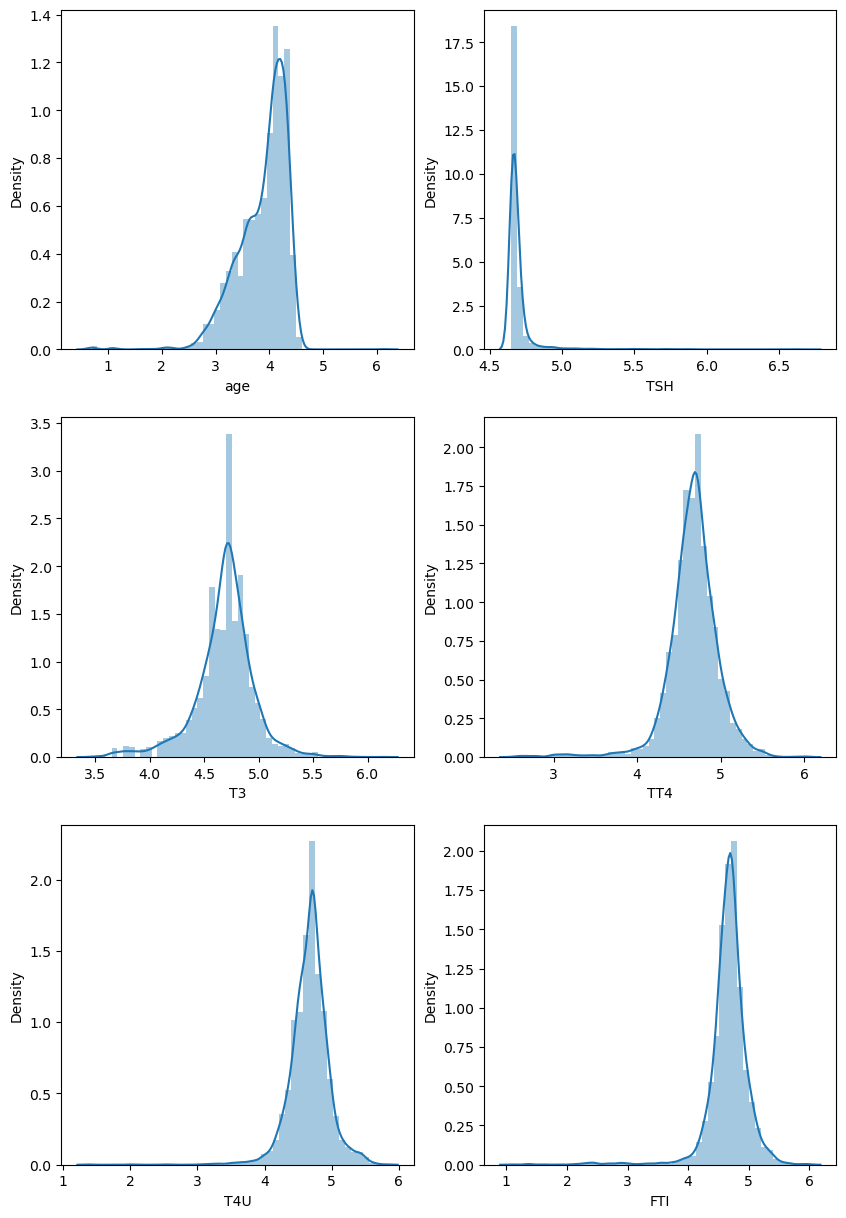

In [43]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15))
r = 1

for i in columns:
    final[i]+=1
    plt.subplot(3,2,r)
    sns.distplot(np.log(final[i]))
    plt.xlabel(i,fontsize=10)
    r+=1
plt.show()

After log transformation, rest of the columns look fine but 'TSH' has a weird trend.

It won't give much of information so let's drop this column.

In [44]:
final = final.drop(['TSH'],axis=1)

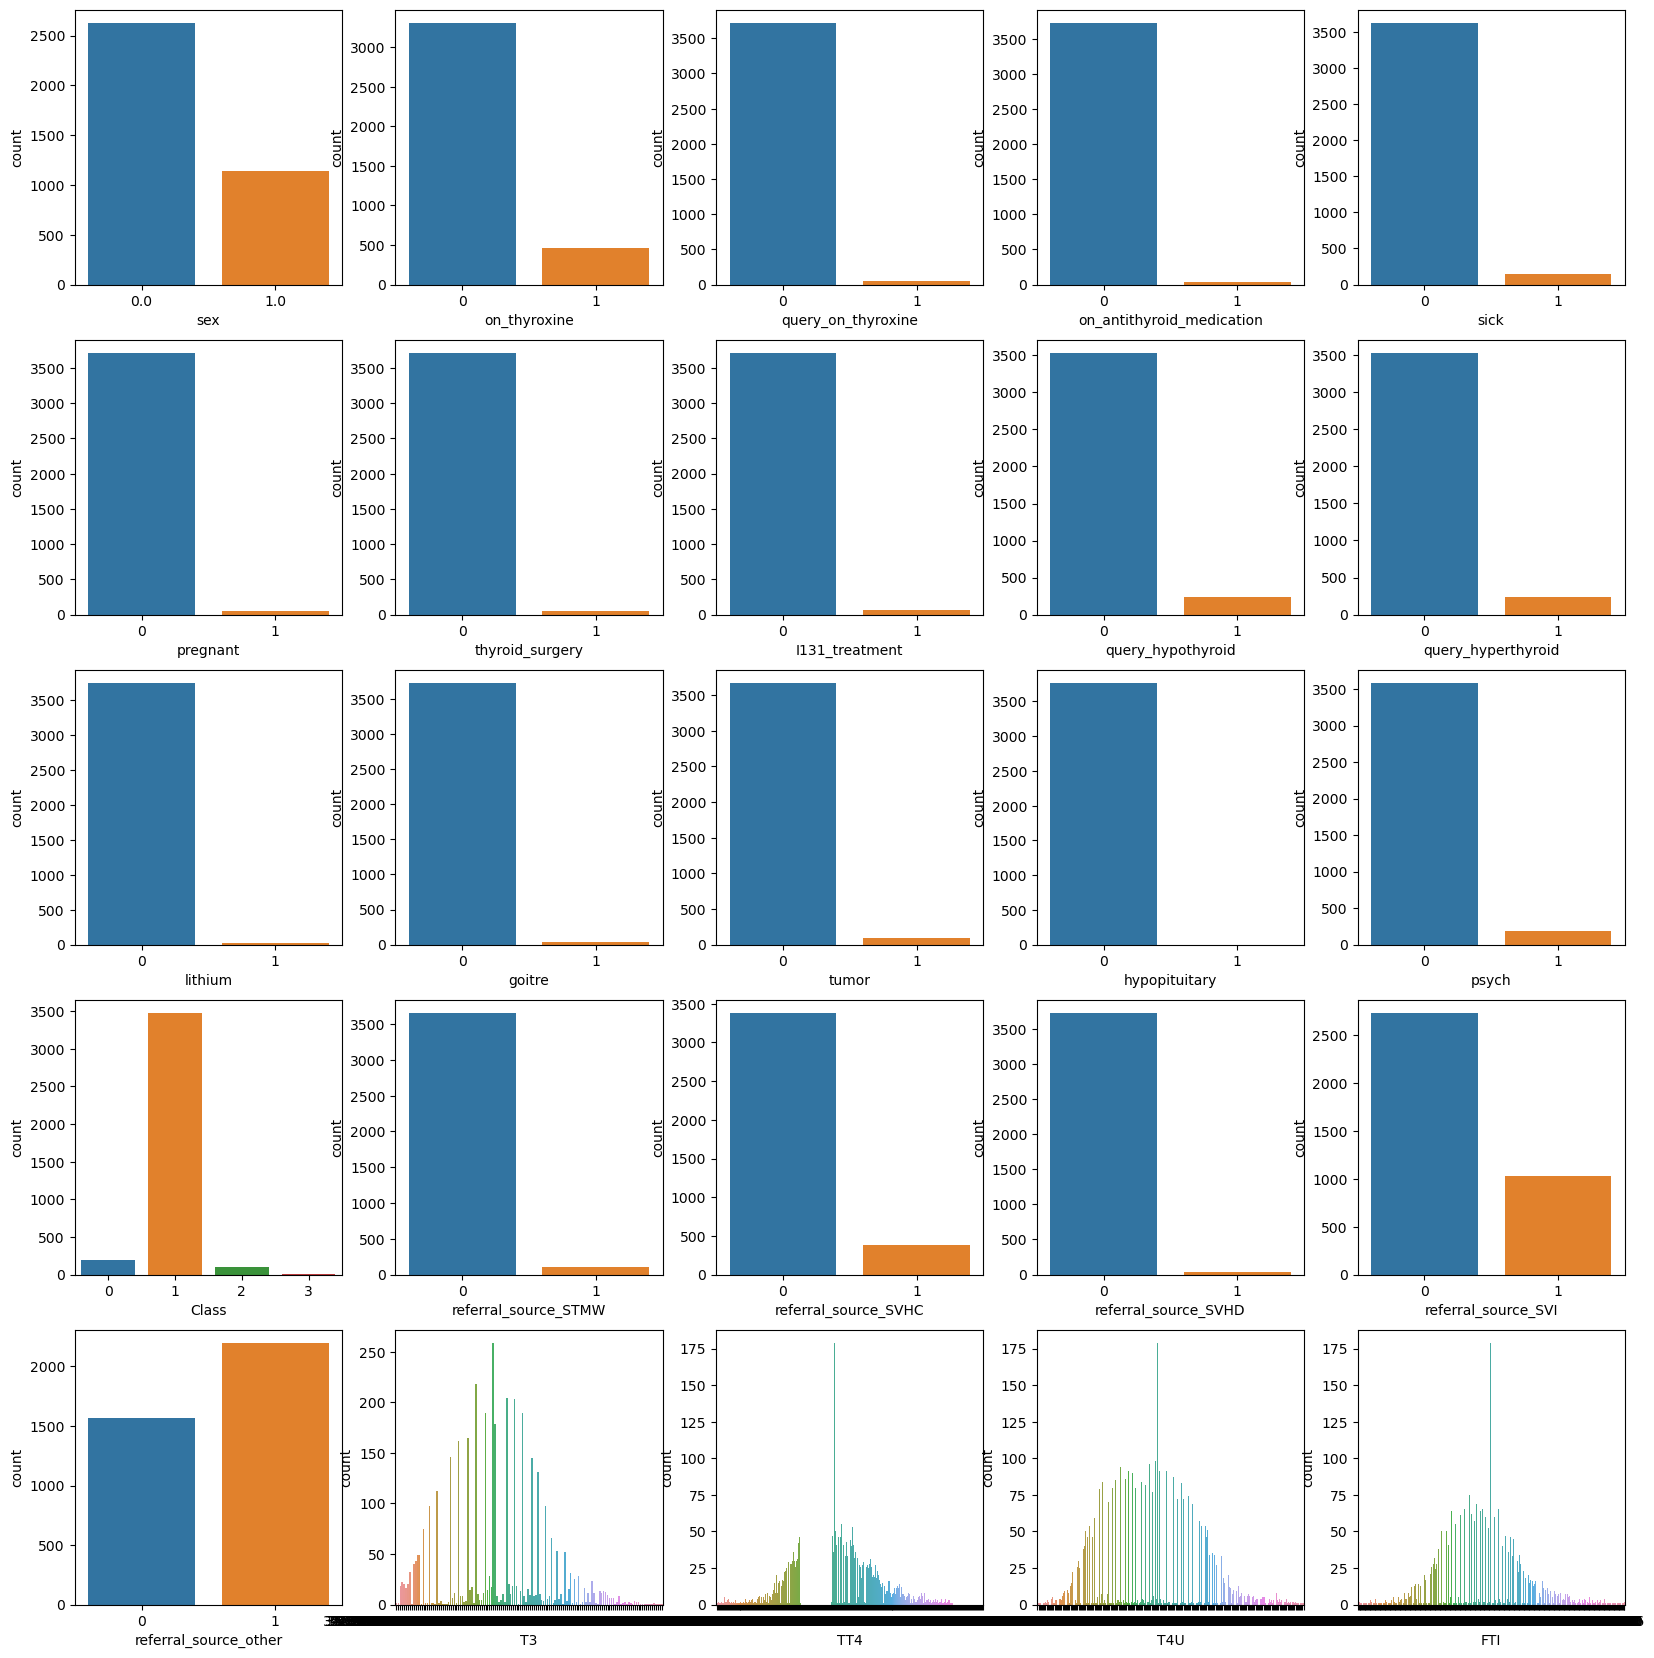

In [45]:
# let's see how data is distributed for every column for every individual id
# the graph plot below is for individual ids. Press 1 in the  input box below the graph to continue viewing graph for each id!!

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
plt_data = final.drop(['age'], axis =1)

for column in plt_data:
    ax = plt.subplot(6,5,plotnumber)
    sns.countplot(x = plt_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1

plt.show()


* we have observed that most of the patients are male 
* rare no of the patients are on thyroxine treatment.
* too much people made a query on thyroxine usage.
* many patiets are taking anithyroid medication.
* 

In [46]:
final.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,T3,TT4,T4U,FTI
0,42,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,130.925513,126.972133,136.017296,110.000000
1,24,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,110.929770,105.596645,125.859670,95.666667
2,47,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,106.930622,112.102229,97.079728,121.000000
3,71,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,106.930622,173.440585,113.444793,177.000000
4,71,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,78.936582,67.492515,90.307976,71.000000


In [47]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 0 to 3771
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   int32  
 1   sex                        3771 non-null   float64
 2   on_thyroxine               3771 non-null   int64  
 3   query_on_thyroxine         3771 non-null   int64  
 4   on_antithyroid_medication  3771 non-null   int64  
 5   sick                       3771 non-null   int64  
 6   pregnant                   3771 non-null   int64  
 7   thyroid_surgery            3771 non-null   int64  
 8   I131_treatment             3771 non-null   int64  
 9   query_hypothyroid          3771 non-null   int64  
 10  query_hyperthyroid         3771 non-null   int64  
 11  lithium                    3771 non-null   int64  
 12  goitre                     3771 non-null   int64  
 13  tumor                      3771 non-null   int64

In [48]:
# our data is ready for modeling now 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = final.drop('Class',axis = 1)
y = final.Class

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
KNN=KNeighborsClassifier(n_neighbors=3)

In [72]:
pred = KNN.fit(xtrain,ytrain).predict(xtest)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [74]:
print('accuracy score : ',accuracy_score(ytest,pred))

accuracy score :  0.9205298013245033


In [75]:
print('confusion matrix')
confusion_matrix(ytest,pred)

confusion matrix


array([[  4,  36,   0],
       [ 13, 675,   2],
       [  3,   6,  16]], dtype=int64)

In [76]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.20      0.10      0.13        40
           1       0.94      0.98      0.96       690
           2       0.89      0.64      0.74        25

    accuracy                           0.92       755
   macro avg       0.68      0.57      0.61       755
weighted avg       0.90      0.92      0.91       755



In [68]:
from sklearn.model_selection import cross_val_score

In [70]:
np.mean(cross_val_score(estimator=KNN,X= xtrain,y = ytrain,scoring='accuracy'))

0.9293790429749705

In [78]:
xtrain.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,T3,TT4,T4U,FTI
3340,74,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.940839,113.031598,100.465603,119.000000
538,74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,110.929770,91.656110,86.357788,103.333333
3430,86,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,110.929770,106.526014,146.739236,88.000000
2183,48,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,102.931473,95.373586,98.772665,100.000000
3425,33,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,125.593315,119.537181,198.655994,79.000000


In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier()

In [81]:
pred = dt.fit(xtrain,ytrain).predict(xtest)

In [83]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.09      0.10      0.09        40
           1       0.94      0.94      0.94       690
           2       0.89      0.68      0.77        25

    accuracy                           0.88       755
   macro avg       0.64      0.57      0.60       755
weighted avg       0.89      0.88      0.89       755



In [ ]:
#Need more modelling and tuning

In [86]:
xtrain.shape

(3016, 25)